In [90]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


from medmnist import PneumoniaMNIST


In [91]:
train_dataset = PneumoniaMNIST(split='train', download=True, transform=lambda im : np.array(im.getdata()).reshape(im.size[0], im.size[1]))
test_dataset = PneumoniaMNIST(split='test', download=True, transform=lambda im : np.array(im.getdata()).reshape(im.size[0], im.size[1]))
val_dataset = PneumoniaMNIST(split='val', download=True, transform=lambda im : np.array(im.getdata()).reshape(im.size[0], im.size[1]))

Using downloaded and verified file: /home/twelve/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/twelve/.medmnist/pneumoniamnist.npz
Using downloaded and verified file: /home/twelve/.medmnist/pneumoniamnist.npz


In [92]:
def dataset_to_numpy(dataset):
    x = []
    y = []
    for i in range(len(dataset)):
        x.append(dataset[i][0])
        y.append(dataset[i][1])
    return np.array(x), np.array(y)

def normalize(x):
    x = 2 * x / np.max(x) - 1
    return x


In [93]:
x_train, y_train = dataset_to_numpy(train_dataset)
x_test, y_test = dataset_to_numpy(test_dataset)
x_val, y_val = dataset_to_numpy(val_dataset)

x_train = normalize(x_train)
x_test = normalize(x_test)
x_val = normalize(x_val)

y_train = y_train[:, 0]
y_test = y_test[:, 0]
y_val = y_val[:, 0]


# Combine and shuffle datasets
x = np.concatenate((x_train, x_test, x_val))
y = np.concatenate((y_train, y_test, y_val))

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


In [94]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 1600)              0         
                                                                 
 dense_22 (Dense)            (None, 128)             

In [95]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
118/118 [==============================] - 2s 14ms/step - loss: 0.2494 - accuracy: 0.9007 - val_loss: 0.1551 - val_accuracy: 0.9402
Epoch 2/10
118/118 [==============================] - 1s 13ms/step - loss: 0.1715 - accuracy: 0.9367 - val_loss: 0.1419 - val_accuracy: 0.9530
Epoch 3/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1536 - accuracy: 0.9445 - val_loss: 0.1428 - val_accuracy: 0.9509
Epoch 4/10
118/118 [==============================] - 2s 13ms/step - loss: 0.1412 - accuracy: 0.9493 - val_loss: 0.1268 - val_accuracy: 0.9584
Epoch 5/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1407 - accuracy: 0.9482 - val_loss: 0.1253 - val_accuracy: 0.9477
Epoch 6/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1187 - accuracy: 0.9592 - val_loss: 0.1294 - val_accuracy: 0.9541
Epoch 7/10
118/118 [==============================] - 2s 14ms/step - loss: 0.1314 - accuracy: 0.9517 - val_loss: 0.1285 - val_accuracy: 0.9530

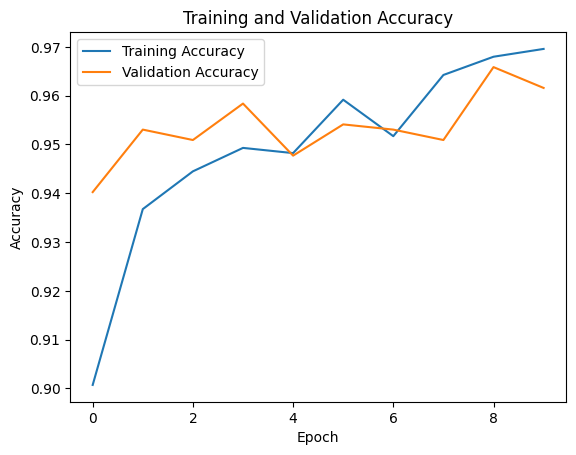

In [96]:
# Plot training loss and validation loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [97]:
test_loss = model.evaluate(x_test, y_test)

37/37 [==============================] - 0s 4ms/step - loss: 0.0989 - accuracy: 0.9667
